### Agreement

http://www.mitpressjournals.org/doi/pdf/10.1162/coli.07-034-R2

http://www.nltk.org/_modules/nltk/metrics/agreement.html

http://courses.washington.edu/cmling/lab7.html

https://en.wikipedia.org/wiki/Krippendorff%27s_alpha
    
### Toy example:

In [1]:
import nltk
import numpy as np
import pandas as pd
import glob
from nltk.metrics.agreement import AnnotationTask
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
toy_data = [['1', 5723, 'ORG'],['2', 5723, 'ORG'],['1', 55829, 'LOC'],['2', 55829, 'LOC'],['1', 259742, 'PER'],['2', 259742, 'LOC'],['1', 269340, 'PER'],['2', 269340, 'LOC']]
#toy_data = [['1', 5723, 'ORG'],['2', 5723, 'ORG'],['1', 55829, 'LOC'],['2', 55829, 'LOC'],['1', 259742, 'PER'],['2', 259742, 'PER'],['1', 269340, 'LOC'],['2', 269340, 'LOC']]
task = AnnotationTask(data=toy_data)
print (task.kappa())
print (task.alpha())
toy_data

0.3333333333333333
0.29999999999999993


[['1', 5723, 'ORG'],
 ['2', 5723, 'ORG'],
 ['1', 55829, 'LOC'],
 ['2', 55829, 'LOC'],
 ['1', 259742, 'PER'],
 ['2', 259742, 'LOC'],
 ['1', 269340, 'PER'],
 ['2', 269340, 'LOC']]

In [3]:
clusteredred_agreements = []
clusteredred_words = []
for file in glob.glob ("data_noOs_csv-files/clustered-reduced/output*"):
    print (file) 
    anno_word = pd.read_csv(file, sep='\t')
    
    n_annotators=[]
    annotations = []
    for index, element in anno_word.label.iteritems():
        current_annotations = element.split("|")
        if not (all ([anno == "_" or anno == "O" for anno in current_annotations])):
            for ind_annotator, annotation in enumerate(current_annotations):
                anno_tuple = (ind_annotator, index, annotation)
                annotations.append (anno_tuple)
            n_annotators.append(len(current_annotations))
    task = AnnotationTask(data=annotations)
#    print (set(n_annotators))
    print (annotations[0][2])
    print (task.alpha())
    filtered_annotations = [anno for anno in annotations if (anno[2]!='_' and anno!='O')]
    filtered_task = AnnotationTask(data=filtered_annotations)
    print (filtered_task.alpha())
#    print (task.kappa())
    clusteredred_agreements.append(filtered_task.alpha())
    clusteredred_words.append(annotations[0][2])
#    print ()



data_noOs_csv-files/clustered-reduced/output0.csv
blik_1_1_1_2_1_4
0.5560976691579251
0.6136158591597376
data_noOs_csv-files/clustered-reduced/output1.csv
hul_2b
0.7360818049018016
0.7783498730312047
data_noOs_csv-files/clustered-reduced/output2.csv
kort_F_røde kort
0.7086003306046377
0.7812871670106969
data_noOs_csv-files/clustered-reduced/output3.csv
model_2
0.7818807552785787
0.8874760076775432
data_noOs_csv-files/clustered-reduced/output4.csv
plads-1a
0.7167750994947641
0.7388865460679386
data_noOs_csv-files/clustered-reduced/output5.csv
selskab-4-4a
0.8326125994063107
0.912823904286659
data_noOs_csv-files/clustered-reduced/output6.csv
skade1-1b-1c
0.7538885684143788
0.7974962190767136
data_noOs_csv-files/clustered-reduced/output7.csv
skud_F_sidste-(seneste,-nyeste,-..)-skud-på-stammen
0.630538373509271
0.687564936621857
data_noOs_csv-files/clustered-reduced/output8.csv
slag_F_slag i luften
0.7043142708152268
0.7884633720825356
data_noOs_csv-files/clustered-reduced/output9.csv
vold

In [4]:
clustered_agreements = []
clustered_words = []
for file in glob.glob ("data_noOs_csv-files/clustered/output*"):
    print (file) 
    anno_word = pd.read_csv(file, sep='\t')
    
    n_annotators=[]
    annotations = []
    for index, element in anno_word.label.iteritems():
        current_annotations = element.split("|")
        if not (all ([anno == "_" for anno in current_annotations])):
            for ind_annotator, annotation in enumerate(current_annotations):
                anno_tuple = (ind_annotator, index, annotation)
                annotations.append (anno_tuple)
            n_annotators.append(len(current_annotations))
    task = AnnotationTask(data=annotations)
    clustered_words.append(annotations[0][2])
    print (task.alpha())
    print (annotations[0][2])
    filtered_annotations = [anno for anno in annotations if anno[2]!='_']
    filtered_task = AnnotationTask(data=filtered_annotations)
    clustered_agreements.append(filtered_task.alpha())
    print (filtered_task.alpha())
    print ()

data_noOs_csv-files/clustered/output0.csv
0.5923363294875235
blik_1_1
0.6101220278585388

data_noOs_csv-files/clustered/output1.csv
0.5895460488394653
hul_1_1b_1e
0.6124528976387719

data_noOs_csv-files/clustered/output2.csv
0.7338218622535442
kort_3
0.7666353578355433

data_noOs_csv-files/clustered/output3.csv
0.784672395140331
model_F_stå-model-til
0.8401695996597374

data_noOs_csv-files/clustered/output4.csv
0.5695959849318822
B-plads-1a
0.78495096401292

data_noOs_csv-files/clustered/output5.csv
0.6692883111403728
B-selskab-1c
0.6908863962027584

data_noOs_csv-files/clustered/output6.csv
0.659970274820799
B-skade1-1b-1c
0.683619145752067

data_noOs_csv-files/clustered/output7.csv
0.5727233176130727
skud_3
0.6057602586238566

data_noOs_csv-files/clustered/output8.csv
0.7730600059978735
slag_1_1c
0.8057847915582265

data_noOs_csv-files/clustered/output9.csv
0.5346558317399617
vold1_1_1a
0.6582611748186287



In [5]:
regular_agreements = []
regular_words = []
for file in glob.glob ("data_noOs_csv-files/regular/output*"):
    print (file) 
    anno_word = pd.read_csv(file, sep='\t')
    
    n_annotators=[]
    annotations = []
    for index, element in anno_word.label.iteritems():
        current_annotations = element.split("|")
        if not (all ([anno == "_" for anno in current_annotations])):
            for ind_annotator, annotation in enumerate(current_annotations):
                anno_tuple = (ind_annotator, index, annotation)
                annotations.append (anno_tuple)
            n_annotators.append(len(current_annotations))
    print (set(n_annotators))
    filtered_annotations = [anno for anno in annotations if anno[2]!='_']
    filtered_task = AnnotationTask(data=filtered_annotations)
    task = AnnotationTask(data=annotations)
    regular_agreements.append(filtered_task.alpha())
    regular_words.append(annotations[0][2])
    print (task.alpha())
    print (annotations[0][2])
    print (filtered_task.alpha())
    print ()

data_noOs_csv-files/regular/output0.csv
{2}
0.5421005368845412
blik_1_2
0.586733695260268

data_noOs_csv-files/regular/output1.csv
{2}
0.662002175663648
hul_2a
0.7159758808660962

data_noOs_csv-files/regular/output2.csv
{2}
0.7039938282594504
kort_3
0.7076067907528965

data_noOs_csv-files/regular/output3.csv
{2}
0.7108470252453178
model_5
0.7376065801364751

data_noOs_csv-files/regular/output4.csv
{2}
0.7184313954393338
plads-2
0.7304383084773922

data_noOs_csv-files/regular/output5.csv
{8, 2, 10}
0.5606379604131051
B-selskab-1
0.5695474931742035

data_noOs_csv-files/regular/output6.csv
{2}
0.6774098471786256
skade_1_1c
0.7335954213245606

data_noOs_csv-files/regular/output7.csv
{2}
0.5727233176130727
skud_F_skud-i-tågen
0.6057602586238566

data_noOs_csv-files/regular/output8.csv
{2}
0.7596448543591341
slag_1c
0.7924014979355376

data_noOs_csv-files/regular/output9.csv
{2}
0.307076678725845
vold1_1
0.3327685175489534



In [6]:
print (clusteredred_words)
print (clustered_words)
print (regular_words)
for indel, el in enumerate(regular_words):
    print (indel, clusteredred_words[indel], clustered_words[indel], regular_words[indel])

['blik_1_1_1_2_1_4', 'hul_2b', 'kort_F_røde kort', 'model_2', 'plads-1a', 'selskab-4-4a', 'skade1-1b-1c', 'skud_F_sidste-(seneste,-nyeste,-..)-skud-på-stammen', 'slag_F_slag i luften', 'vold1_1_1a_1b_1c']
['blik_1_1', 'hul_1_1b_1e', 'kort_3', 'model_F_stå-model-til', 'B-plads-1a', 'B-selskab-1c', 'B-skade1-1b-1c', 'skud_3', 'slag_1_1c', 'vold1_1_1a']
['blik_1_2', 'hul_2a', 'kort_3', 'model_5', 'plads-2', 'B-selskab-1', 'skade_1_1c', 'skud_F_skud-i-tågen', 'slag_1c', 'vold1_1']
0 blik_1_1_1_2_1_4 blik_1_1 blik_1_2
1 hul_2b hul_1_1b_1e hul_2a
2 kort_F_røde kort kort_3 kort_3
3 model_2 model_F_stå-model-til model_5
4 plads-1a B-plads-1a plads-2
5 selskab-4-4a B-selskab-1c B-selskab-1
6 skade1-1b-1c B-skade1-1b-1c skade_1_1c
7 skud_F_sidste-(seneste,-nyeste,-..)-skud-på-stammen skud_3 skud_F_skud-i-tågen
8 slag_F_slag i luften slag_1_1c slag_1c
9 vold1_1_1a_1b_1c vold1_1_1a vold1_1


<IPython.core.display.Javascript object>


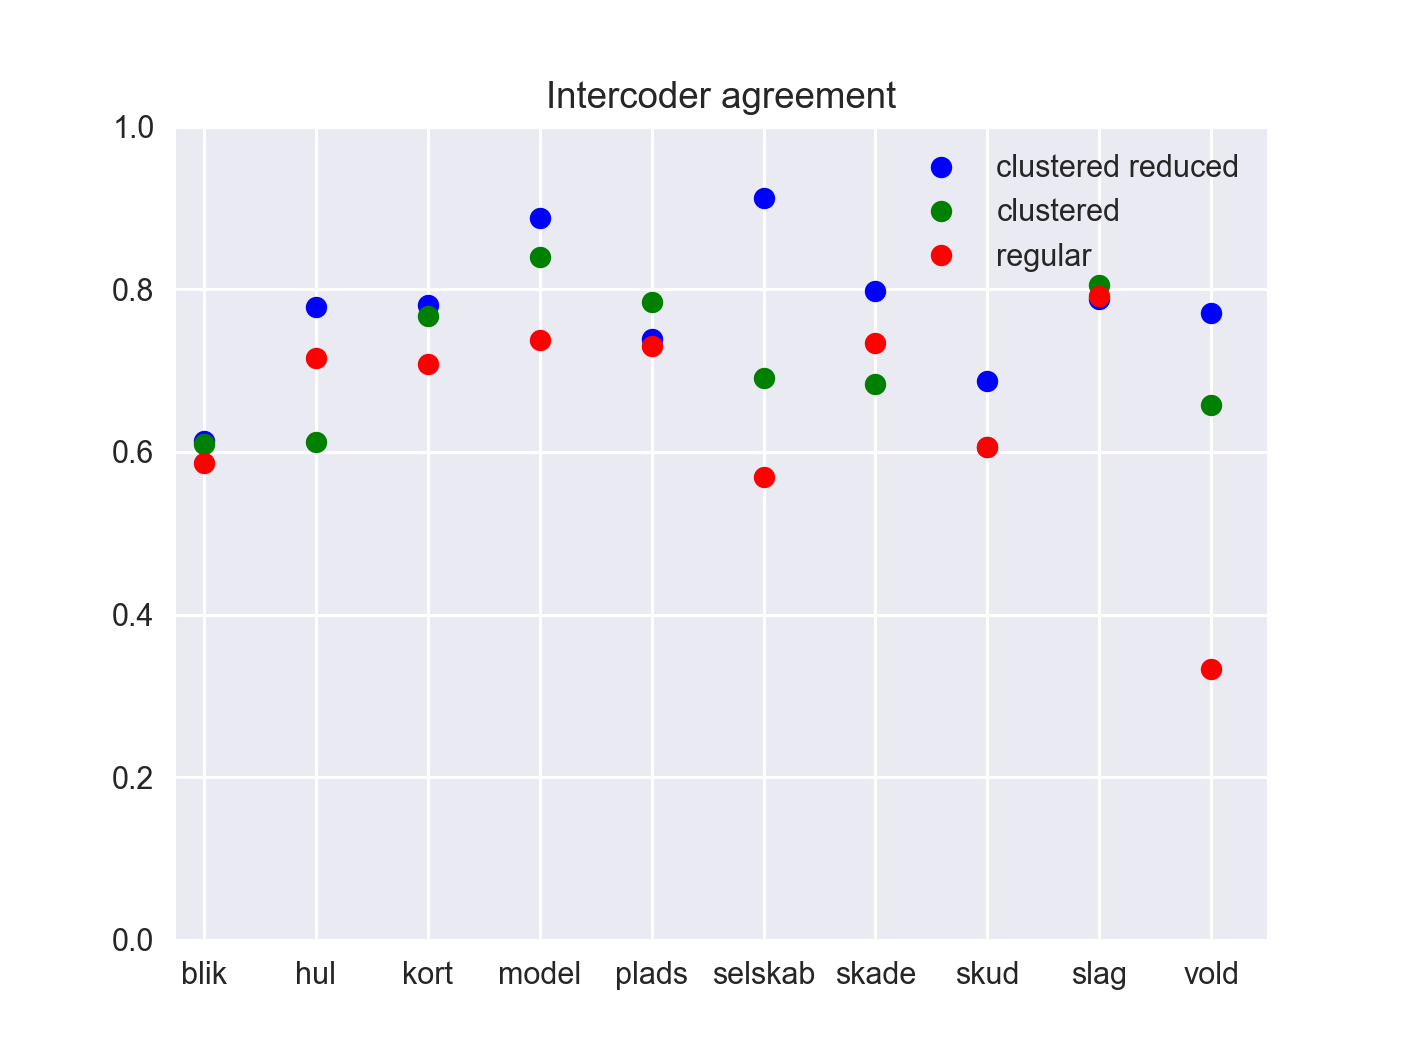

Current size: [6.4, 4.8]


In [7]:
def cleanword(w):
    return ''.join([char for char in w if char.isalpha()])
    
xrange=range(0,20, 2)
word_labels = ['blik','hul','kort','model','plads','selskab','skade','skud','slag','vold']
plt.plot (xrange, clusteredred_agreements, 'bo', label="clustered reduced")
#plt.xticks( range(10), [cleanword(w) for w in clusteredred_words])
plt.xticks( xrange, word_labels)
plt.plot (xrange, clustered_agreements, 'go', label="clustered")
plt.plot (xrange, regular_agreements, 'ro', label="regular")
plt.axis([-0.5, 19, 0.0, 1.0])
plt.legend(loc='best')
plt.title ("Intercoder agreement")

#Got from https://codeyarns.com/2014/10/27/how-to-change-size-of-matplotlib-plot/
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: Current size: [6.4, 4.8]
print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size


#plt.savefig("agreement_plot_sns.png", dpi = 500, orientation='landscape')



In [ ]:
anno_word = pd.read_csv("data_noOs_csv-files/regular/output7.csv", sep='\t')
    
n_annotators=[]
annotations = []
for index, element in anno_word.label.iteritems():
    current_annotations = element.split("|")
    if not (all ([anno == "_" or anno == "O" for anno in current_annotations])):
        for ind_annotator, annotation in enumerate(current_annotations):
            anno_tuple = (ind_annotator, index, annotation)
            annotations.append (anno_tuple)
        n_annotators.append(len(current_annotations))
task = AnnotationTask(data=annotations)
filtered_annotations = [anno for anno in annotations if anno[2]!='_']
filtered_task = AnnotationTask(data=filtered_annotations)
print (task.alpha())
print (annotations[0][2])
print ("Filtered annotations alpha")
print (filtered_task.alpha())
print (len(annotations))
print (len(filtered_annotations))
print ((len(annotations)-len(filtered_annotations))/len(annotations))

In [11]:
results = pd.DataFrame ([word_labels, regular_agreements, clustered_agreements, clusteredred_agreements]).T
#help(results.set_index)
results.columns = ["", "Regular", "Clustered", "Clustered reduced"]
results=results.set_index("")
print (results)

          Regular Clustered Clustered reduced
                                             
blik     0.586734  0.610122          0.613616
hul      0.715976  0.612453           0.77835
kort     0.707607  0.766635          0.781287
model    0.737607   0.84017          0.887476
plads    0.730438  0.784951          0.738887
selskab  0.569547  0.690886          0.912824
skade    0.733595  0.683619          0.797496
skud      0.60576   0.60576          0.687565
slag     0.792401  0.805785          0.788463
vold     0.332769  0.658261          0.770371
